In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fraud  = pd.read_csv("C://data science//data sets//Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud["income"]="<=30000"

In [5]:
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
fraud["income"].unique()

array(['Good', 'Risky'], dtype=object)

In [7]:
fraud["income"].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [8]:
### dropping the Taxable.Income columns
fraud = fraud.drop(['Taxable.Income'],axis=1)
fraud.rename(columns={"Marital.Status":"marital","City.Population":"population","Work.Experience":"workexp"},inplace=True)
fraud.isnull().sum()

Undergrad     0
marital       0
population    0
workexp       0
Urban         0
income        0
dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [10]:
features = fraud.iloc[:,0:5]

In [11]:
labels = pd.DataFrame(fraud.iloc[:,5])

In [14]:
fraud["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, stratify=labels)


In [17]:
print(y_train["income"].value_counts())

0    333
1     87
Name: income, dtype: int64


In [18]:
print(y_test["income"].value_counts())
        

0    143
1     37
Name: income, dtype: int64


In [19]:
##Converting the column names into the list format
colnames = list(fraud.columns)
predictors = colnames[:5]
target = colnames[5]

In [20]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   marital     600 non-null    int32
 2   population  600 non-null    int64
 3   workexp     600 non-null    int64
 4   Urban       600 non-null    int32
 5   income      600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [21]:
###Splitting the data in train and test data
##One of the way to split the data
#fraud["is_train"] = np.random.uniform(0,1,len(fraud))<=0.70
#fraud["is_train"]
#train,test = fraud[fraud["is_train"]==True],fraud[fraud["is_train"]==False]

In [22]:
from sklearn.tree import DecisionTreeClassifier as DT

model = DT(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
from sklearn.metrics import accuracy_score
##Prediciton on train data 
pred_train = pd.DataFrame(model.predict(x_train))

In [24]:
### Finding the accuracy of train data
acc_train = accuracy_score(y_train,pred_train) #100%

In [29]:
##Confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train)

array([[333,   0],
       [  0,  87]], dtype=int64)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_train,pred_train))

In [27]:
cm

,0,1
0,333,0
1,0,87


In [32]:
##Prediction on test data
pred_test = pd.DataFrame(model.predict(x_test))

In [ ]:
acc_test = accuracy_score(y_test,pred_test)

In [31]:
acc_test

0.6111111111111112

In [34]:
#confusion matrix for test data
cm_test = confusion_matrix(y_test,pred_test)

In [35]:
cm_test

array([[109,  34],
       [ 36,   1]], dtype=int64)

In [45]:
##Visualizing the decision trees
from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

In [40]:
dot_data = StringIO()

In [46]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [47]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [48]:
graph

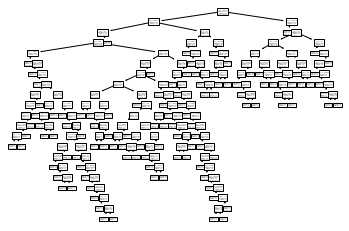

In [59]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

In [53]:
###PDF file of Decision tree
graph[0].write_pdf('fraud.pdf')

True

In [52]:
##PNG file of Decision tree
graph[0].write_png('fraud.png')

True